In [21]:
%matplotlib inline
import sys
sys.path.append('..')
from lightjob.db import DB, SUCCESS, RUNNING
import pandas as pd
from scipy.stats import skew
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
filename = '../.lightjob/'

In [4]:
db = DB()
db.load(filename)

In [5]:
def get_stat(j):
    #return 1 - jref['content']['model_params']['wta_lifetime_perc']
    return j['content']['contractive_coef']

stat_label = 'Contractive coef'
#stat_label = 'Sparsity'

In [6]:
where = 'jobset5'

In [7]:
stats = defaultdict(list)
for j in db.jobs_with(state=SUCCESS, type='generation'):
    content = j['content']
    s = content['model_summary']
    jref = db.get_job_by_summary(s)
    if jref['where'] != where:
        continue
    if "stats" not in j:
        continue
    #v = 1 - jref['content']['model_params']['wta_lifetime_perc']
    v = get_stat(jref)
    stats['stat'].append(v)
    
    d = j['stats']
    for k, v in d.items():
        stats[k].append(v)

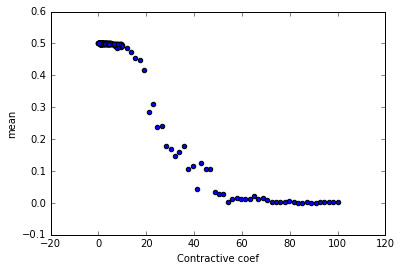

In [8]:
plt.scatter(stats['stat'], np.array(stats['mean']))
plt.xlabel(stat_label)
plt.ylabel('mean')
plt.savefig('mean.png')

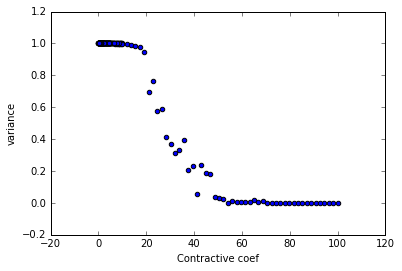

In [9]:
#maxvar = ((10000 - 1 + 1)**2 - 1) / 12 # variance of max entropy distribution (discrete uniform between 1 and 10000) of the discrete distrib : 
# https://en.wikipedia.org/wiki/Uniform_distribution_(discrete)
plt.scatter(stats['stat'], np.array(stats['var']))
plt.xlabel(stat_label)
plt.ylabel('variance')
plt.savefig('variance.png')

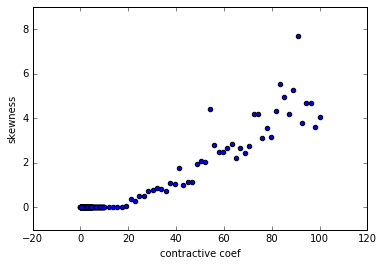

In [10]:
plt.scatter(stats['stat'], np.array(stats['skew']))
plt.xlabel('contractive coef')
plt.ylabel('skewness')
plt.savefig('skewness.png')

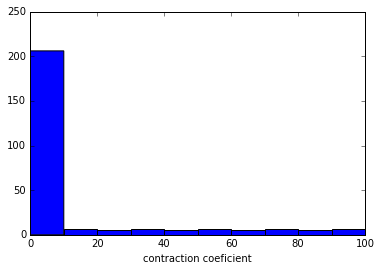

In [11]:
plt.hist(stats['stat'])
plt.xlabel('contraction coeficient')

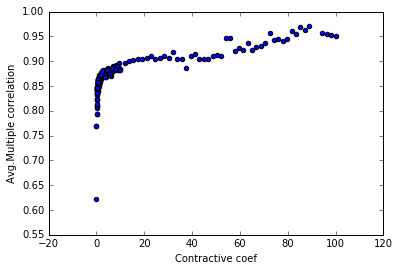

In [12]:
plt.scatter(stats['stat'], stats['multiplecorrelation'])
plt.xlabel(stat_label)
plt.ylabel('Avg.Multiple correlation')
plt.savefig('corr.png')

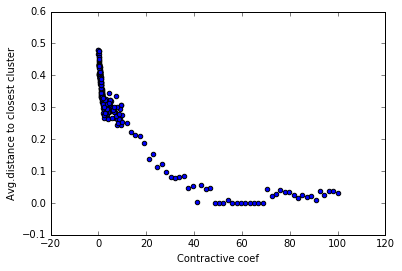

In [13]:
#maxdist = np.sqrt(784) # we have binary images, so euclidean dist between full zero vector minus full one vector
plt.scatter(stats['stat'], stats['clusdiversity'])
#plt.xlabel('contractive coef')
plt.xlabel(stat_label)
plt.ylabel('Avg.distance to closest cluster')
plt.savefig('clus.png')

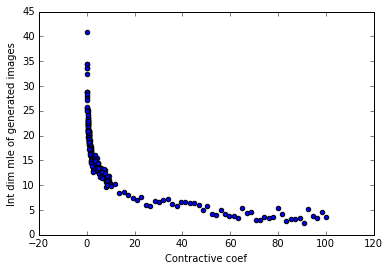

In [14]:
#maxdist = np.sqrt(784) # we have binary images, so euclidean dist between full zero vector minus full one vector
plt.scatter(stats['stat'], stats[u'intdim_mle'])
#plt.xlabel('contractive coef')
plt.xlabel(stat_label)
plt.ylabel('Int dim mle of generated images')
plt.savefig('intdim.png')

In [15]:
from lasagnekit.datasets.mnist import MNIST

Couldn't import dot_parser, loading of dot files will not be possible.


In [35]:
data = MNIST()
data.load()
X = data.X[0:10000]

(array([ 1.,  1.,  1.,  2.,  0.,  3.,  0.,  1.,  0.,  1.]),
 array([ 15.10517301,  15.12298713,  15.14080124,  15.15861535,
         15.17642947,  15.19424358,  15.2120577 ,  15.22987181,
         15.24768592,  15.26550004,  15.28331415]),
 <a list of 10 Patch objects>)

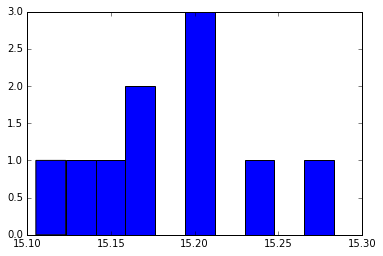

In [38]:
from scripts.intdim_mle import repeated, intrinsic_dim_scale_interval
k1 = 10 # start of interval(included)
k2 = 20 # end of interval(included)
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             X, 
                             mode='bootstrap', 
                             nb_iter=10, # nb_iter for bootstrapping
                             verbose=1, 
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)
# the shape of intdim_k_repeated is (nb_iter, size_of_interval) where 
# nb_iter is number of bootstrap iterations (here 500) and size_of_interval
# is (k2 - k1 + 1).

# Plotting the histogram of intrinsic dimensionality estimations repeated over
# nb_iter experiments
plt.hist(intdim_k_repeated.mean(axis=1))